<a href="https://colab.research.google.com/github/yoursmaddyy/deep-learning-playground/blob/main/batch_norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadsajad/concertriccir2")

print("Path to dataset files:", path)

100%|██████████| 12.2k/12.2k [00:00<00:00, 15.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muhammadsajad/concertriccir2/versions/1


In [10]:
df = pd.read_csv(path + "/concertriccir2.csv", header=None, names = ["x1" , "x2", "y"])

In [11]:
df.head()

,x1,x2,y
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


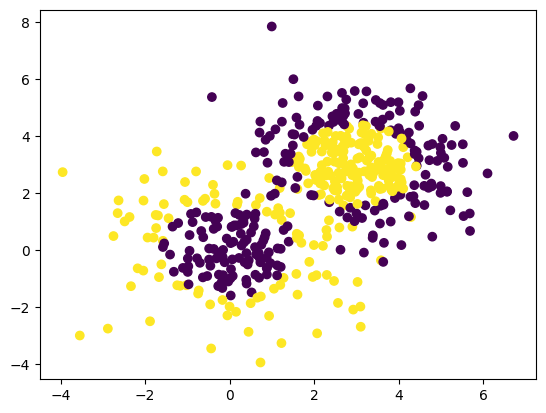

In [15]:
plt.scatter(df['x1'],df['x2'],c=df['y'])

In [16]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [17]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [18]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4778 - loss: 0.6932 - val_accuracy: 0.4300 - val_loss: 0.6933
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5108 - loss: 0.6931 - val_accuracy: 0.4300 - val_loss: 0.6935
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5215 - loss: 0.6930 - val_accuracy: 0.4300 - val_loss: 0.6938
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5399 - loss: 0.6928 - val_accuracy: 0.4300 - val_loss: 0.6939
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5131 - loss: 0.6930 - val_accuracy: 0.4300 - val_loss: 0.6940
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.4300 - val_loss: 0.6941
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5191 - loss: 0.6929 - val_accuracy: 0.4300 - val_loss: 0.6943
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.4300 - 

In [21]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6117 - loss: 0.6665 - val_accuracy: 0.5700 - val_loss: 0.6924
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5761 - loss: 0.6670 - val_accuracy: 0.5700 - val_loss: 0.6914
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6051 - loss: 0.6726 - val_accuracy: 0.5700 - val_loss: 0.6903
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6356 - loss: 0.6442 - val_accuracy: 0.5700 - val_loss: 0.6899
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5651 - loss: 0.6581 - val_accuracy: 0.5700 - val_loss: 0.6889
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6431 - loss: 0.6343 - val_accuracy: 0.5700 - val_loss: 0.6877
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5966 - loss: 0.6454 - val_accuracy: 0.5700 - val_loss: 0.6869
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6434 - loss: 0.6367 - val_accuracy: 0.5700 - 

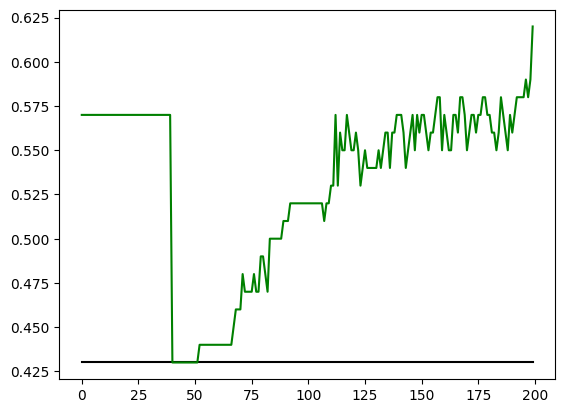

In [24]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')